In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((300.7,305,296.7,263.7,210.3,233,247.3,265.3,287,380.3,341,340,326.3,342.7,280,242.7,273,252,268,278,279.7,274,338.7,328.7,
                 391.3,405.7,389.7,358.0,356.3,330.3,263.7,273.3,229.7,241.0,244.0,160.3,182.0,203.3,221.3,251.7))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,300.7
1,305.0
2,296.7
3,263.7
4,210.3


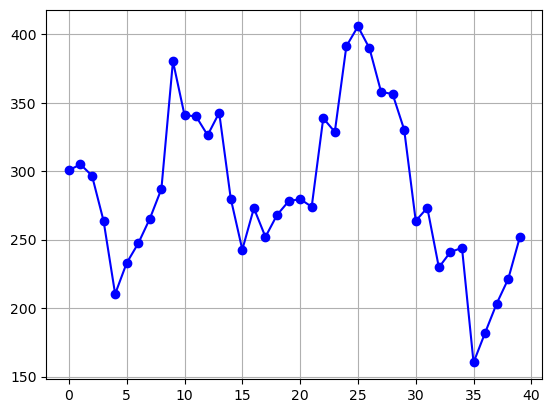

In [25]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


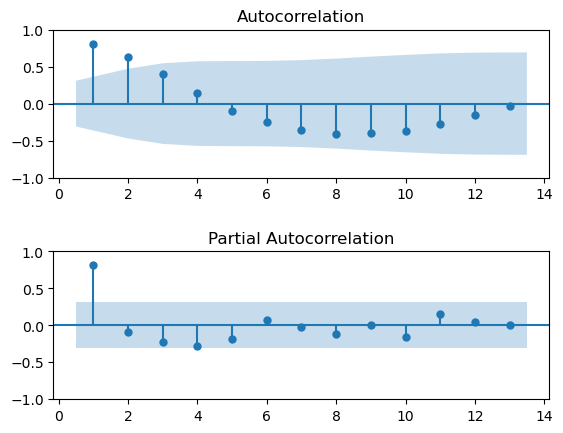

In [26]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


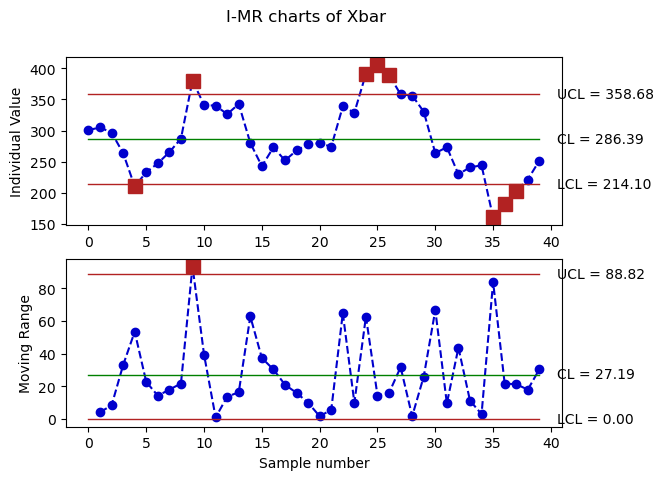

In [27]:
# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df, 'Xbar')

>## Point 2

In [28]:
df['lag1'] = df['Xbar'].shift()
X = df.iloc[1:, 1:]
y = df.iloc[1:, 0]

In [29]:
import qda
stepwise = qda.StepwiseRegression(add_constant = False, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
Term   Coef    P-Value
lag1 0.9886 2.0387e-36

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
35.8443 0.9853     0.9849

######################################
### Step 2
-------------------
Forward Selection
All predictors have been included in the model. Exiting stepwise.
-------------------


In [30]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Xbar =  + 0.989 lag1

COEFFICIENTS
------------
Term   Coef  SE Coef  T-Value    P-Value
lag1 0.9886   0.0196  50.4121 2.0387e-36

MODEL SUMMARY
-------------
      S   R-sq  R-sq(adj)
35.8443 0.9853     0.9849

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS   F-Value    P-Value
Regression  1.0 3.2758e+06 3.2758e+06 2541.3793 2.0387e-36
      lag1  1.0 3.2758e+06 3.2758e+06 2541.3793 2.0387e-36
     Error 38.0 4.8982e+04 1.2890e+03       NaN        NaN
     Total 39.0 3.3248e+06        NaN       NaN        NaN


Shapiro-Wilk test p-value = 0.317


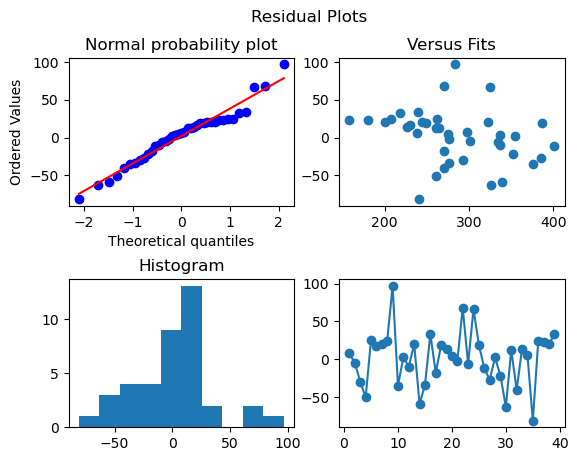

In [31]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.294


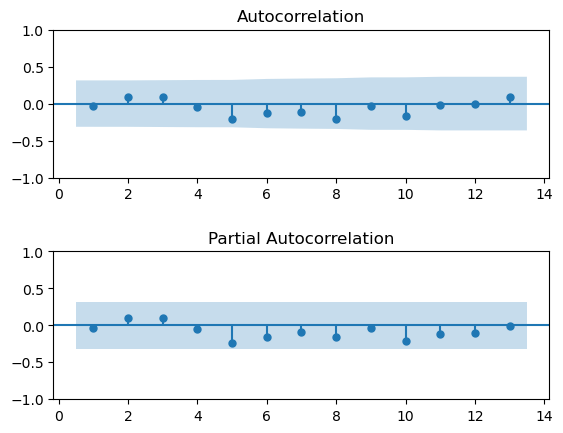

In [32]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(df)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

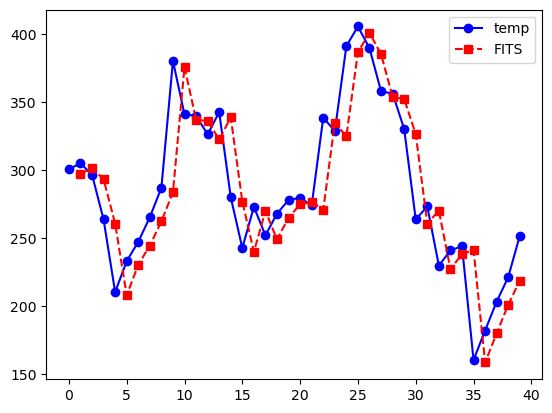

In [33]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

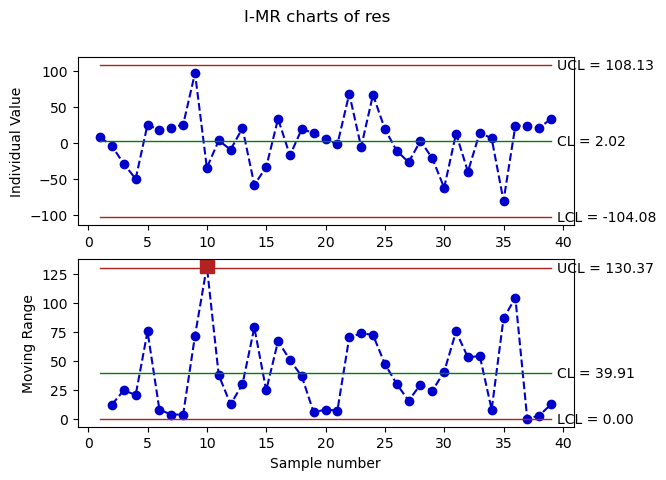

In [34]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

> ## point 3


Shapiro-Wilk test p-value = 0.006


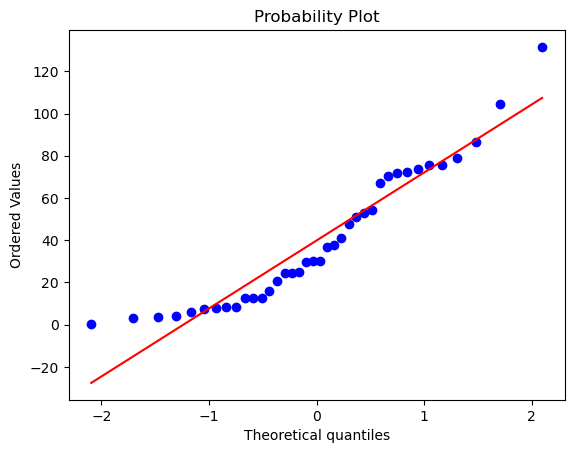

In [35]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC_IMR['MR'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC_IMR['MR'].iloc[1:], dist="norm", plot=plt)
plt.show()

Lambda = 0.390


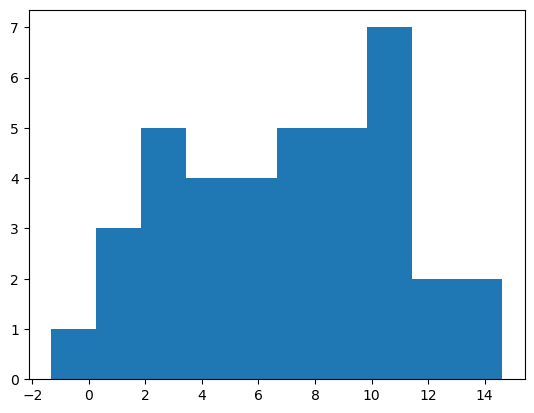

In [36]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(df_SCC_IMR['MR'].iloc[1:])

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

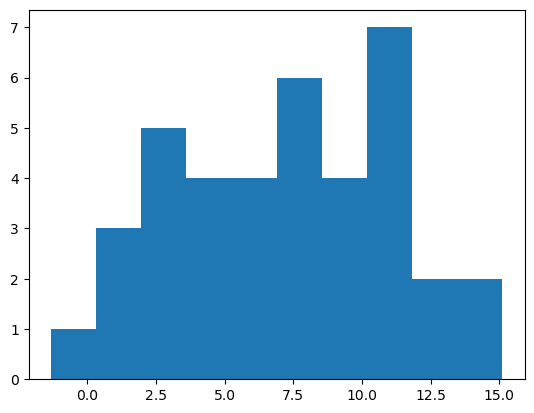

In [39]:
df_SCC_IMR['MR_boxcox'] = stats.boxcox(df_SCC_IMR['MR'], lmbda=0.4)

# Plot a histogram of the transformed data
plt.hist(df_SCC['MR_boxcox'])
plt.show()

Shapiro-Wilk test p-value = 0.465


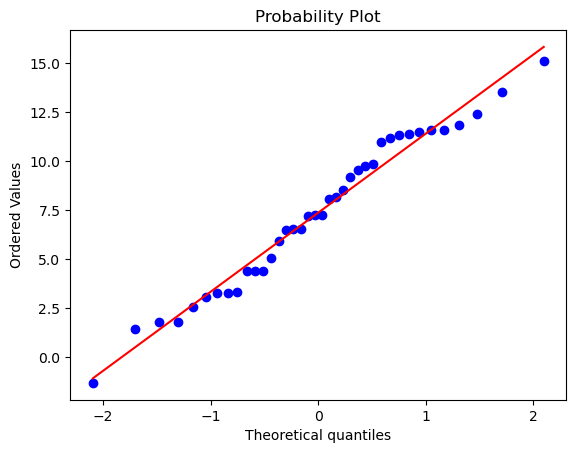

In [40]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df_SCC_IMR['MR_boxcox'].iloc[1:])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df_SCC_IMR['MR_boxcox'].iloc[1:], dist="norm", plot=plt)
plt.show()

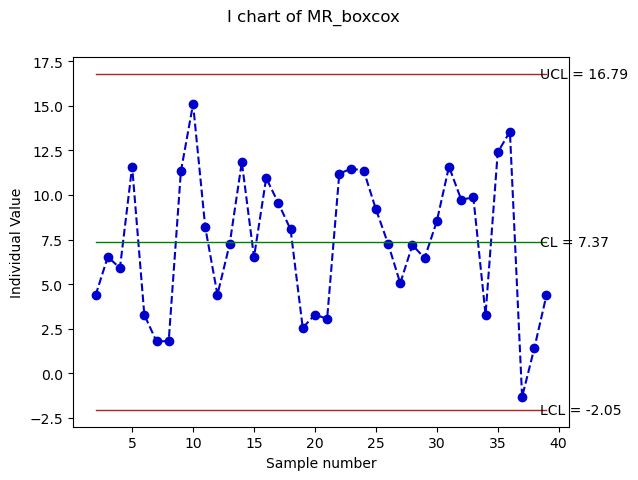

In [41]:
df_MR_boxcox = df_SCC_IMR[['MR_boxcox']].iloc[1:]
df_MR_boxcox = qda.ControlCharts.IMR(df_MR_boxcox, 'MR_boxcox', plotit=False)

# Plot the I and MR charts
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I chart of MR_boxcox'))
ax.plot(df_MR_boxcox['MR_boxcox'], color='mediumblue', linestyle='--', marker='o')
ax.plot(df_MR_boxcox['I_UCL'], color='firebrick', linewidth=1)
ax.plot(df_MR_boxcox['I_CL'], color='g', linewidth=1)
ax.plot(df_MR_boxcox['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df_MR_boxcox['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_CL'].iloc[0], 'CL = {:.2f}'.format(df_MR_boxcox['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(df_MR_boxcox)+.5, df_MR_boxcox['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df_MR_boxcox['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(df_MR_boxcox['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()
